<br>  

## <span style='color:blue'>From Kaggle</span>  

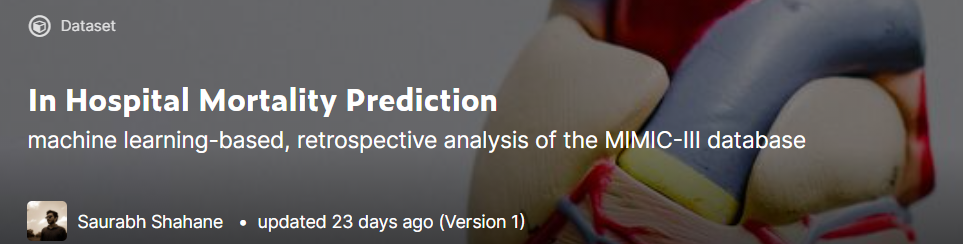  

### <span style='color:blue'>Context</span>  
The predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients remain poorly characterized. We aimed to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.  

### <span style='color:blue'>Content</span>  
Using Structured Query Language queries (PostgreSQL, version 9.6), demographic characteristics, vital signs, and laboratory values data were extracted from the following tables in the MIMIC III dataset: ADMISSIONS, PATIENTS, ICUSTAYS, DICD DIAGNOSIS, DIAGNOSISICD, LABEVENTS, DLABIEVENTS, CHARTEVENTS, DITEMS, NOTEEVENTS, and OUTPUTEVENTS. Based on previous studies 7-9 13-15, clinical relevance, and general availability at the time of presentation, we extracted the following data: demographic characteristics (age at the time of hospital admission, sex, ethnicity, weight, and height); vital signs (heart rate, (HR), systolic blood pressure [SBP], diastolic blood pressure [DBP], mean blood pressure, respiratory rate, body temperature, saturation pulse oxygen [SPO2], urine output [first 24 h]); comorbidities (hypertension, atrial fibrillation, ischemic heart disease, diabetes mellitus, depression, hypoferric anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease [COPD]); and laboratory variables (hematocrit, red blood cells, mean corpuscular hemoglobin [MCH], mean corpuscular hemoglobin concentration [MCHC], mean corpuscular volume [MCV], red blood cell distribution width [RDW], platelet count, white blood cells, neutrophils, basophils, lymphocytes, prothrombin time [PT], international normalized ratio [INR], NT-proBNP, creatine kinase, creatinine, blood urea nitrogen [BUN] glucose, potassium, sodium, calcium, chloride, magnesium, the anion gap, bicarbonate, lactate, hydrogen ion concentration [pH], partial pressure of CO2 in arterial blood, and LVEF), using Structured Query Language (SQL) with PostgreSQL (version 9.6). Demographic characteristics and vital signs extracted were recorded during the ﬁrst 24 hours of each admission and laboratory variables were measured during the entire ICU stay. Comorbidities were identified using ICD-9 codes. For variable data with multiple measurements, the calculated mean value was included for analysis. The primary outcome of the study was in-hospital mortality, defined as the vital status at the time of hospital discharge in survivors and non-survivors.  

### <span style='color:blue'>Acknowledgements</span>  
Zhou, Jingmin et al. (2021), Prediction model of in-hospital mortality in intensive care unit patients with heart failure: machine learning-based, retrospective analysis of the MIMIC-III database, Dryad, Dataset, https://doi.org/10.5061/dryad.0p2ngf1zd  

### <span style='color:blue'>LICENSE - CC0 1.0 Universal (CC0 1.0) Public Domain Dedication</span>  

### <span style='color:blue'>Target Variable - Outcome</span>  
0 - Alive  
1 - Death  

### <span style='color:blue'>Source</span>  
https://www.kaggle.com/saurabhshahane/in-hospital-mortality-prediction  
<br>  
<br>  


<br>  

## <span style='color:blue'>Section 1: Import</span>  

In [1]:
import pandas as pd
import numpy as np
import copy

<br>  

## <span style='color:blue'>Section 2: Read</span>  

In [2]:
df_1 = pd.read_csv('../data/code_1_data.csv')

<br>  

## <span style='color:blue'>Section 3: Format column names</span>  

In [3]:
# ---------- change to lower case ----------

df_1.columns = df_1.columns.str.lower()

# ---------- change space to underscore ----------

df_1.columns = df_1.columns.str.replace(" ", "_")

<br>  

## <span style='color:blue'>Section 4: Shape</span>  

In [4]:
df_1.shape

(1177, 51)

<br>  

## <span style='color:blue'>Section 5: Missing values</span>  

In [5]:
temp_df = zip(df_1.isnull().sum().sort_values(ascending=False).index,
              df_1.isnull().sum().sort_values(ascending=False).values,
              np.round(df_1.isnull().sum().sort_values(ascending=False).values/len(df_1)*100, 1))

temp_df = pd.DataFrame(temp_df, columns=['variable', 'missing_count', 'missing_%'])

temp_df['total_count'] = len(df_1)

temp_df = temp_df[['variable', 'missing_count', 'total_count', 'missing_%']]

temp_df[0:]

,variable,missing_count,total_count,missing_%
0,pco2,294,1177,25.0
1,ph,292,1177,24.8
2,basophils,259,1177,22.0
3,lactic_acid,229,1177,19.5
4,bmi,215,1177,18.3
5,creatine_kinase,165,1177,14.0
6,lymphocyte,145,1177,12.3
7,neutrophils,144,1177,12.2
8,urine_output,36,1177,3.1
9,inr,20,1177,1.7


<br>  

## <span style='color:blue'>Section 6: Dataframe sample</span>  

In [6]:
# ---------- columns 0 to 19 ----------

df_1.iloc[0:5, 0:20]

,group,id,outcome,age,gendera,bmi,hypertensive,atrialfibrillation,chd_with_no_mi,diabetes,deficiencyanemias,depression,hyperlipemia,renal_failure,copd,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,respiratory_rate,temperature
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905


In [7]:
# ---------- columns 20 to 39 ----------

df_1.iloc[0:5, 20:40]

,sp_o2,urine_output,hematocrit,rbc,mch,mchc,mcv,rdw,leucocyte,platelets,neutrophils,basophils,lymphocyte,pt,inr,nt-probnp,creatine_kinase,creatinine,urea_nitrogen,glucose
0,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364
1,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000
2,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000
3,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000
4,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000


In [8]:
# ---------- columns 40 to end ----------

df_1.iloc[0:5, 40:]

,blood_potassium,blood_sodium,blood_calcium,chloride,anion_gap,magnesium_ion,ph,bicarbonate,lactic_acid,pco2,ef
0,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


<br>  

## <span style='color:blue'>Section 7: Category count</span>  

In [9]:
temp_df = []

for i in df_1.columns:
    temp_df.append([i, len(df_1[i].value_counts(dropna=False))])

temp_df = pd.DataFrame(temp_df, columns=['variable', 'category_count'])

temp_df.sort_values(by='category_count', inplace=True, ascending=True)

temp_df[0:]

,variable,category_count
0,group,2
14,copd,2
13,renal_failure,2
4,gendera,2
12,hyperlipemia,2
6,hypertensive,2
7,atrialfibrillation,2
8,chd_with_no_mi,2
9,diabetes,2
10,deficiencyanemias,2


<br>  

## <span style='color:blue'>Section 8: Info</span>  

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   id                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   bmi                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   chd_with_no_mi            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  hyperlipemia              1177 non-null   int64  
 13  renal_failure             1177 non-null   int64  
 14  copd    

<br>  

## <span style='color:blue'>Section 9: Data type</span>  

In [11]:
df_1.dtypes.value_counts()

float64    37
int64      14
dtype: int64

<br>  

## <span style='color:blue'>Section 10: Drop ID column and save dataset</span>  

In [12]:
df_1.drop(columns=['id']).to_csv('../data/code_2_data.csv', na_rep='NaN', index_label='index')

<br>  
<br>  

## <span style='color:green'>Conclusions:</span>  

### <span style='color:green'>Section 4</span>  
* <span style='color:green'>Dataframe has 51 columns and 1,177 rows.</span>  

### <span style='color:green'>Section 7</span>  
* <span style='color:green'>"id" has 1,177 unique values and dataframe has 1,177 rows.</span>  
* <span style='color:green'>Hence there are no duplicate data.</span>  

### <span style='color:green'>Section 5</span>  
* <span style='color:green'>8 features have missing values from 12.2% to 25.0%.</span>  
* <span style='color:green'>11 features have missing values from 0.1% to 3.1%.</span>  
* <span style='color:green'>Target ('outcome') has 1 missing value.</span>  

### <span style='color:green'>Section 7 and Section 9</span>  
* <span style='color:green'>11 features are categorical and encoded in numeric.</span>  
* <span style='color:green'>Target is categorical and encoded in numeric.</span>  
* <span style='color:green'>38 features are continuous.</span>  
<br>  
<br>  


3 Jan 2022